In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
# Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [ ]:
# 1. Customer Analysis
def analyze_customers():
    print("Customer Analysis:")
    print("\nCustomer distribution by region:")
    print(customers['Region'].value_counts())

    # Customer signup trends
    plt.figure(figsize=(12, 6))
    customers['SignupDate'].dt.month.value_counts().sort_index().plot(kind='bar')
    plt.title('Customer Signups by Month')
    plt.show()

In [ ]:
 # 2. Product Analysis
def analyze_products():
    print("\nProduct Analysis:")
    print("\nProduct distribution by category:")
    print(products['Category'].value_counts())

    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(products['Price'])
    plt.title('Product Price Distribution')
    plt.show()


In [ ]:
# 3. Transaction Analysis
def analyze_transactions():
    # Merge data for comprehensive analysis
    merged_data = transactions.merge(customers, on='CustomerID')\
                            .merge(products, on='ProductID')

    # Transaction trends over time
    plt.figure(figsize=(15, 6))
    merged_data.groupby('TransactionDate')['TotalValue'].sum().plot()
    plt.title('Daily Transaction Values')
    plt.show()

    # Category performance
    category_performance = merged_data.groupby('Category').agg({
        'TransactionID': 'count',
        'TotalValue': 'sum',
        'Quantity': 'sum'
    })
    print("\nCategory Performance:")
    print(category_performance)

In [ ]:
# 4. Customer Behavior Analysis
def analyze_customer_behavior():
    # Customer purchase frequency
    customer_frequency = transactions.groupby('CustomerID')['TransactionID'].count()

    plt.figure(figsize=(10, 6))
    sns.histplot(customer_frequency)
    plt.title('Customer Purchase Frequency Distribution')
    plt.show()

    # Average transaction value by region
    merged_data = transactions.merge(customers, on='CustomerID')
    region_stats = merged_data.groupby('Region')['TotalValue'].agg(['mean', 'count'])
    print("\nRegion Statistics:")
    print(region_stats)

Customer Analysis:

Customer distribution by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


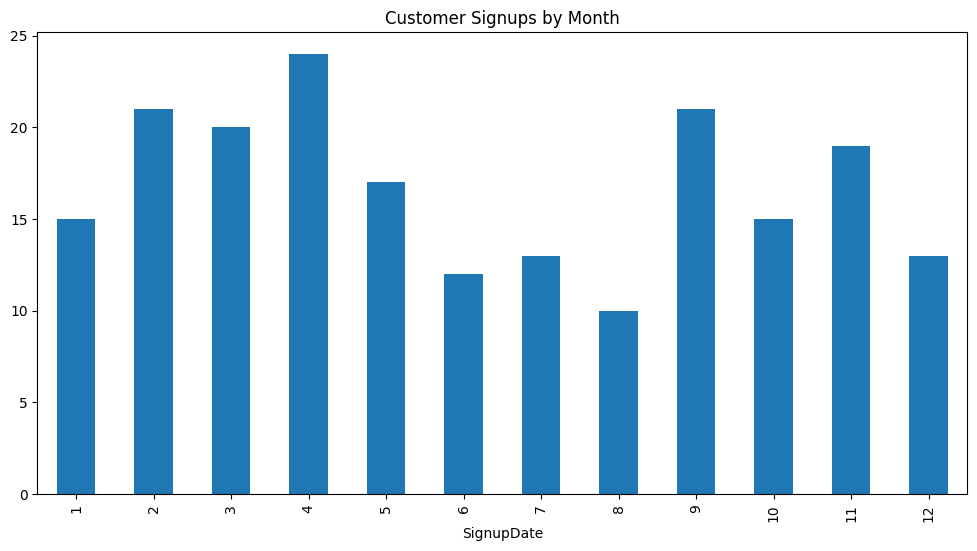

In [ ]:
# Run all analyses
analyze_customers()



Product Analysis:

Product distribution by category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


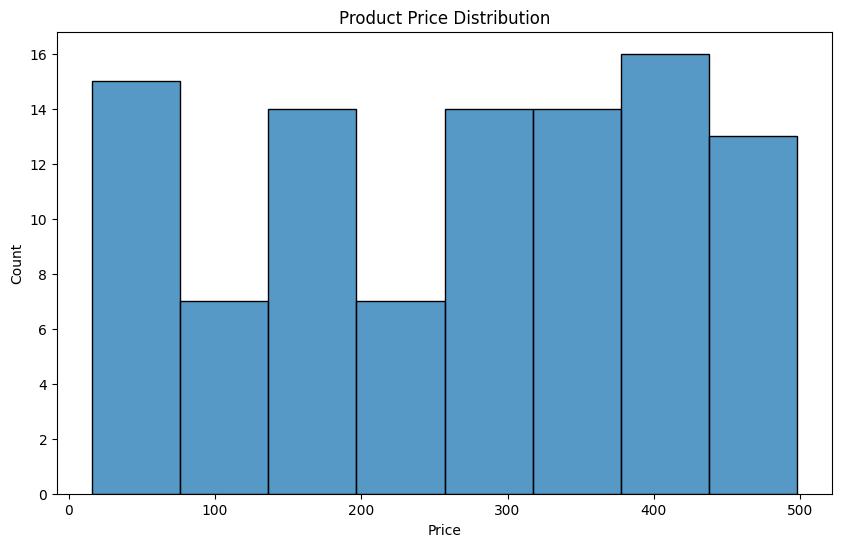

In [ ]:
analyze_products()



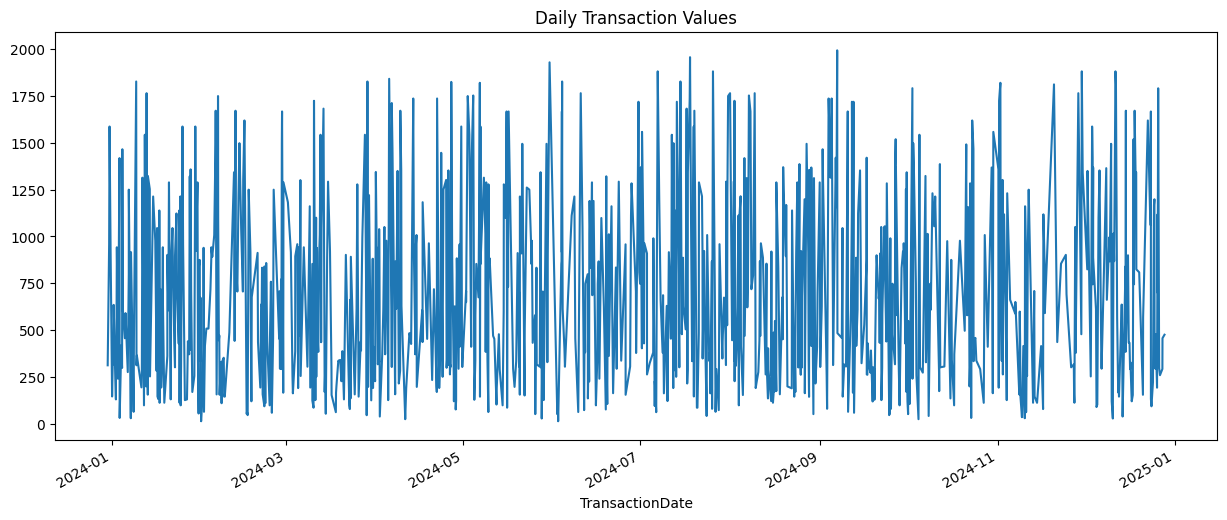


Category Performance:
             TransactionID  TotalValue  Quantity
Category                                        
Books                  270   192147.47       681
Clothing               228   166170.66       590
Electronics            254   180783.50       627
Home Decor             248   150893.93       639


In [ ]:
analyze_transactions()


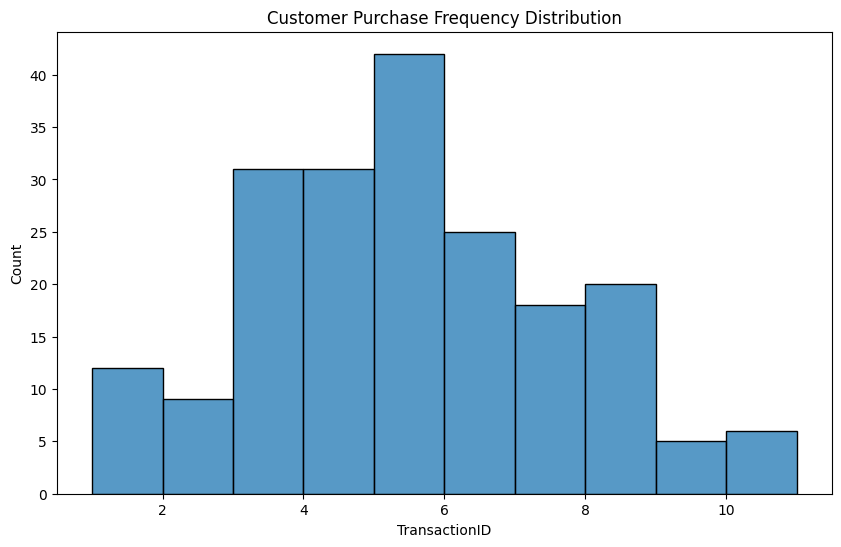


Region Statistics:
                     mean  count
Region                          
Asia           697.591606    218
Europe         710.489872    234
North America  624.235246    244
South America  721.554474    304


In [ ]:
analyze_customer_behavior()